## Conv1D를 활용한 스팸 메일 분류 

- spam_mail_ex.csv 사용

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
import pandas as pd

df = pd.read_csv('./data/spam_mail_ex.csv') 
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.info()
# 결측값 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
# 중복값 제거

In [4]:
print('text열의 유니크한 값 :', df['text'].nunique())

text열의 유니크한 값 : 5169


In [ ]:

print('총 샘플의 수 :', len(df))

총 샘플의 수 : 5169


In [6]:
# 레이블 설정 : label 열 추가
# 정상메일 : 0, 스팸메일 : 1

In [ ]:

df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df['label'].value_counts()

label
0    4516
1     653
Name: count, dtype: int64

<Axes: xlabel='label'>

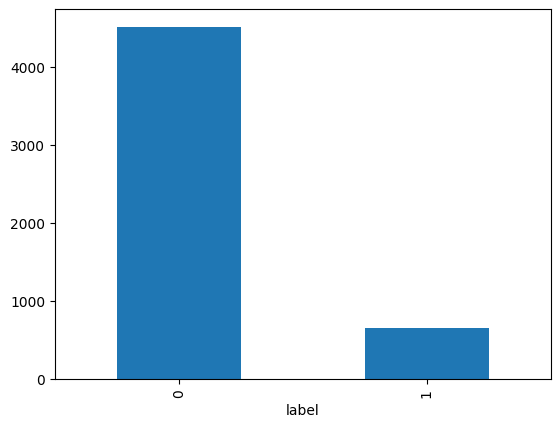

In [9]:
df['label'].value_counts().plot(kind='bar')

In [10]:
# 데이터 셋 분리
# 학습 데이터 셋과 테스트 데이터 셋에서 정상메일과 스팸메일의 비율이 비슷하게 분리 

from sklearn.model_selection import train_test_split

features = df['text']
target = df['label']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, 
                                                    random_state=0, stratify=target) # 균형

In [11]:
print('--------학습 데이터의 비율-----------')
y_train.value_counts(normalize=True) * 100

--------학습 데이터의 비율-----------


label
0    87.376058
1    12.623942
Name: proportion, dtype: float64

In [12]:
print('--------테스트 데이터의 비율-----------')
y_test.value_counts(normalize=True) * 100

--------테스트 데이터의 비율-----------


label
0    87.330754
1    12.669246
Name: proportion, dtype: float64

In [ ]:
# 정수 인코딩 
from tensorflow.keras.preprocessing.text import Tokenizer



In [14]:
print(X_train_encoded[:5])

[[101, 1, 209, 229, 3, 17, 39], [1, 59, 8, 426, 17, 5, 136, 2, 2325], [156, 179, 12, 13, 98, 93, 47, 9, 40, 3482, 246, 8, 7, 87, 6, 80, 1312, 5, 3483, 7, 2326, 11, 660, 305, 20, 25, 466, 708, 1026, 202, 129, 192, 799, 2327, 23, 1, 143, 71, 2, 110, 78, 43, 2, 130, 11, 799, 185, 121, 1512], [1, 1153, 13, 103, 291], [221, 622, 856, 540, 623, 22, 23, 83, 10, 47, 6, 256, 32, 6, 26, 64, 935, 406]]


In [15]:
print(tokenizer.word_index)

{'i': 1, 'to': 2, 'you': 3, 'a': 4, 'the': 5, 'u': 6, 'and': 7, 'in': 8, 'is': 9, 'me': 10, 'my': 11, 'for': 12, 'your': 13, 'it': 14, 'of': 15, 'have': 16, 'on': 17, 'call': 18, 'that': 19, 'are': 20, '2': 21, 'now': 22, 'so': 23, 'but': 24, 'not': 25, 'can': 26, 'or': 27, "i'm": 28, 'get': 29, 'at': 30, 'do': 31, 'if': 32, 'be': 33, 'will': 34, 'just': 35, 'with': 36, 'we': 37, 'no': 38, 'this': 39, 'ur': 40, 'up': 41, '4': 42, 'how': 43, 'gt': 44, 'lt': 45, 'go': 46, 'when': 47, 'from': 48, 'what': 49, 'ok': 50, 'out': 51, 'know': 52, 'free': 53, 'all': 54, 'like': 55, 'then': 56, 'got': 57, 'good': 58, 'am': 59, 'time': 60, 'was': 61, 'come': 62, 'its': 63, 'love': 64, 'want': 65, 'text': 66, 'he': 67, 'only': 68, 'there': 69, 'day': 70, 'need': 71, 'going': 72, 'lor': 73, 'send': 74, 'one': 75, 'as': 76, 'home': 77, 'about': 78, 'back': 79, 'still': 80, 'k': 81, 'see': 82, 'txt': 83, 'by': 84, 'da': 85, 'stop': 86, 'r': 87, 'any': 88, 'tell': 89, 'dont': 90, "i'll": 91, "don't": 9

In [16]:
vocab_size = len(tokenizer.word_index) + 1
print('단어 집합의 크기:', vocab_size)

단어 집합의 크기: 7817


메일의 최대 길이 : 189
메일의 평균 길이 :  15.732527206771463


(array([ 93., 986., 880., 526., 280., 306., 354., 354., 206.,  48.,  29.,
         11.,  12.,   5.,  10.,   7.,   6.,   2.,   6.,   1.,   3.,   1.,
          0.,   3.,   0.,   2.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([  0.  ,   3.78,   7.56,  11.34,  15.12,  18.9 ,  22.68,  26.46,
         30.24,  34.02,  37.8 ,  41.58,  45.36,  49.14,  52.92,  56.7 ,
         60.48,  64.26,  68.04,  71.82,  75.6 ,  79.38,  83.16,  86.94,
         90.72,  94.5 ,  98.28, 102.06, 105.84, 109.62, 113.4 , 117.18,
        120.96, 124.74, 128.52, 132.3 , 136.08, 139.86, 143.64, 147.42,
        151.2 , 154.98, 158.76, 162.54, 166.32, 170.1 , 173.88, 177.66,
        181.44, 185.22, 189.  ]),
 <BarContainer object of 50 artists>)

Text(0.5, 0, 'length of samples')

Text(0, 0.5, 'number of samples')

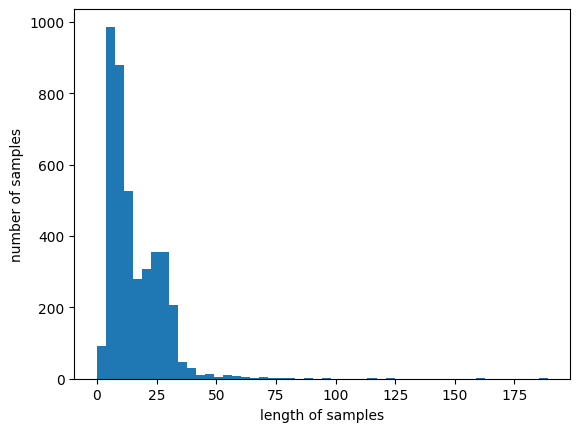

In [17]:
import matplotlib.pyplot as plt
print('메일의 최대 길이 :', max(len(l) for l in X_train_encoded))
print('메일의 평균 길이 : ', (sum(map(len, X_train_encoded))/len(X_train_encoded)))
plt.hist([len(s) for s in X_train_encoded], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [18]:
# 패딩 
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 189
X_train_padded = pad_sequences(X_train_encoded, maxlen = max_len)
print("학습 데이터의 크기(shape): ", X_train_padded.shape)

학습 데이터의 크기(shape):  (4135, 189)


#### 모델 생성 
- 임베딩 벡터 크기 32
- Dropout 30% (0.3)
- Conv1D
  - num_filters 32(필터수 : 출력수)
  - kernel_size 5
  - padding='valid' : 패딩추가하지 않음-output shape 축소됨
  - activation='relu'
- GlobalMaxPooling1D()
- Dropout 30%
- Dense 층 1개 추가  
- optimizer='adam'
- 정확도 측정
- EarlyStopping
- ModelCheckpoint
- 검증 데이터 비율 : 0.2
- epochs = 10
- batch_size=64

In [20]:
from tensorflow.keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Embedding, Dropout, MaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
embedding_dim = 32
num_filters = 32
kernel_size = 5
max_len = 189


model = Sequential()
model.add(

)  
model.add(Dropout(0.3))  
model.add(

)  
model.add(
    
)  
model.add(Dropout(0.3))  
model.add(Dense(1, activation='sigmoid')) 

model.compile(optimizer='adam',  
              loss='binary_crossentropy', 
              metrics=['acc']) 

In [24]:
# 모델 생성
# model = Sequential([
#     Embedding(input_dim=vocab_size, 
#               output_dim=32),
#     Dropout(0.3), 
#     Conv1D(filters=32,  
#            kernel_size=2,  
#            padding='valid',
#            activation='relu'),
#     GlobalMaxPooling1D(), 
#     Dropout(0.3),  
#     Dense(1, activation='sigmoid') 
# ])

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
cp = ModelCheckpoint('./data/best_model_span.keras', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
# 모델 학습
history = model.fit(
    X_train_padded, y_train,

)

Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - acc: 0.8522 - loss: 0.4953 - val_acc: 0.8779 - val_loss: 0.3915
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.8726 - loss: 0.3615 - val_acc: 0.9190 - val_loss: 0.3288
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9046 - loss: 0.2433 - val_acc: 0.9686 - val_loss: 0.1871
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9662 - loss: 0.1178 - val_acc: 0.9722 - val_loss: 0.1229
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9840 - loss: 0.0661 - val_acc: 0.9746 - val_loss: 0.1138
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9857 - loss: 0.0481 - val_acc: 0.9734 - val_loss: 0.0951
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9878 - loss: 0.0380 - val_acc: 0.9722 - val_loss: 0.0841
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9926 - loss: 0.0246 - val_acc: 0.9722 - val_loss: 0.0799
Epoch 9/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9915 - loss: 

In [ ]:
# 테스트 데이터 정수 인코딩 / 패딩
X_test_encoded = 
X_test_padded = 

In [ ]:
model.evaluate(X_test_padded, y_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9829 - loss: 0.0671 


[0.08140315860509872, 0.9796905517578125]

Text(0.5, 1.0, 'model loss')

Text(0, 0.5, 'loss')

Text(0.5, 0, 'epoch')

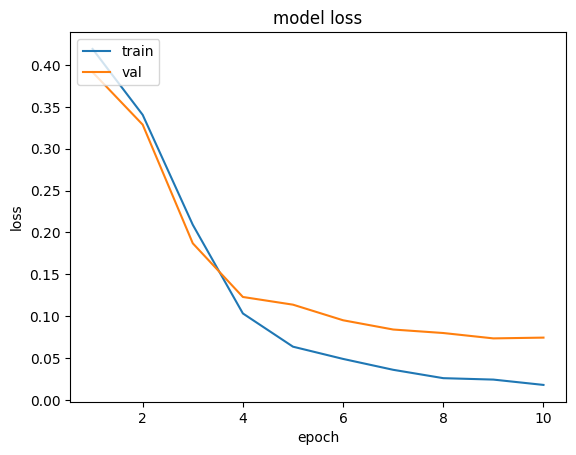

In [48]:
# 시각화 
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Text(0.5, 1.0, 'model acc')

Text(0, 0.5, 'acc')

Text(0.5, 0, 'epoch')

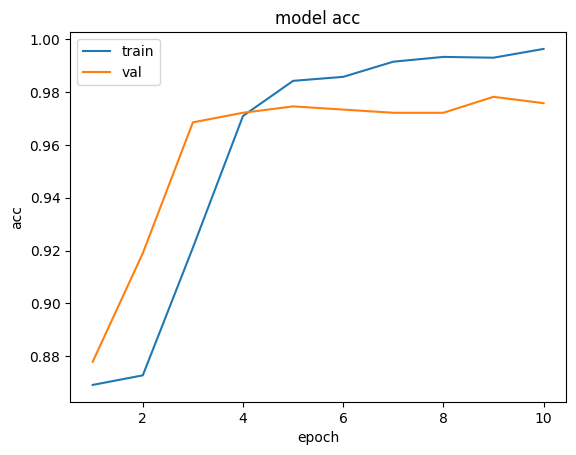

In [49]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [50]:
model.summary()

# Embedding : 입력수(7822) x 출력수(32) = 250,304
# Conv1D : 커널크기(5) x 입력수(32) x 필터수(출력수)(32) + 필터당 바이어스(출력수)(32) = 5 * 32 * 32 + 32 = 5,152
# Dense : (입력수(32) + 바이어스(1)) x 출력수(1) = (32 + 1) * 1 = 33

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ (None, 189, 32)             │         250,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 189, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_6 (Conv1D)                    │ (None, 185, 32)             │           5,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_6               │ (None, 32)                  │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 765,989 (2.92 MB)

 Trainable params: 255,329 (997.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 510,660 (1.95 MB)